# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website

url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html

In [5]:
# Extract all rows of data
html_soup = soup(html, 'html.parser')

table = html_soup.find('table', class_="table")
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [6]:
# Create an empty list
mars_info = []

rows = table.find_all('tr')
rows

[<tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>,
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-2

In [7]:
#rows[1]
# rows[0].find('tr',"data-row").text.strip()
rows[0].find('th').text.strip()
# --> id


'id'

In [8]:
list=rows[1].find_all('tr')
list

[]

In [9]:
list[1].text

IndexError: list index out of range

In [10]:
rows[2].find('td').text.strip()
# --> id

'13'

In [11]:
list=rows[1].find('td')  
list

<td>2</td>

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [12]:

for i,line in enumerate(rows):
    
    # Extract the summary
    
    if (i==0):  
        row = line.find_all('th')
        _col0 = row[0].text
        _col1 = row[1].text
        _col2 = row[2].text
        _col3 = row[3].text
        _col4 = row[4].text
        _col5 = row[5].text
        _col6 = row[6].text
    else:
        row = line.find_all('td')        
        _data0 = row[0].text
        _data1 = row[1].text
        _data2 = row[2].text
        _data3 = row[3].text
        _data4 = row[4].text
        _data5 = row[5].text
        _data6 = row[6].text

        _dict = {
            _col0: _data0,
            _col1: _data1,
            _col2: _data2,
            _col3: _data3,
            _col4: _data4,
            _col5: _data5,
            _col6: _data6,
        }

            # Append the dictionary to the question list
        print(_dict)
        mars_info.append(_dict)      

{'id': '2', 'terrestrial_date': '2012-08-16', 'sol': '10', 'ls': '155', 'month': '6', 'min_temp': '-75.0', 'pressure': '739.0'}
{'id': '13', 'terrestrial_date': '2012-08-17', 'sol': '11', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '740.0'}
{'id': '24', 'terrestrial_date': '2012-08-18', 'sol': '12', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '741.0'}
{'id': '35', 'terrestrial_date': '2012-08-19', 'sol': '13', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '732.0'}
{'id': '46', 'terrestrial_date': '2012-08-20', 'sol': '14', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '740.0'}
{'id': '57', 'terrestrial_date': '2012-08-21', 'sol': '15', 'ls': '158', 'month': '6', 'min_temp': '-78.0', 'pressure': '740.0'}
{'id': '68', 'terrestrial_date': '2012-08-22', 'sol': '16', 'ls': '158', 'month': '6', 'min_temp': '-77.0', 'pressure': '740.0'}
{'id': '79', 'terrestrial_date': '2012-08-23', 'sol': '17', 'ls': '159', 'month': '6', 'min_temp':

{'id': '578', 'terrestrial_date': '2014-05-20', 'sol': '635', 'ls': '133', 'month': '5', 'min_temp': '-82.0', 'pressure': '754.0'}
{'id': '582', 'terrestrial_date': '2014-05-21', 'sol': '636', 'ls': '133', 'month': '5', 'min_temp': '-81.0', 'pressure': '752.0'}
{'id': '580', 'terrestrial_date': '2014-05-22', 'sol': '637', 'ls': '134', 'month': '5', 'min_temp': '-80.0', 'pressure': '752.0'}
{'id': '579', 'terrestrial_date': '2014-05-23', 'sol': '638', 'ls': '134', 'month': '5', 'min_temp': '-80.0', 'pressure': '751.0'}
{'id': '581', 'terrestrial_date': '2014-05-24', 'sol': '639', 'ls': '135', 'month': '5', 'min_temp': '-80.0', 'pressure': '750.0'}
{'id': '583', 'terrestrial_date': '2014-05-25', 'sol': '640', 'ls': '135', 'month': '5', 'min_temp': '-81.0', 'pressure': '750.0'}
{'id': '584', 'terrestrial_date': '2014-05-26', 'sol': '641', 'ls': '136', 'month': '5', 'min_temp': '-81.0', 'pressure': '749.0'}
{'id': '585', 'terrestrial_date': '2014-05-27', 'sol': '642', 'ls': '136', 'month':

{'id': '1236', 'terrestrial_date': '2016-04-10', 'sol': '1307', 'ls': '134', 'month': '5', 'min_temp': '-80.0', 'pressure': '748.0'}
{'id': '1237', 'terrestrial_date': '2016-04-11', 'sol': '1308', 'ls': '135', 'month': '5', 'min_temp': '-81.0', 'pressure': '748.0'}
{'id': '1238', 'terrestrial_date': '2016-04-12', 'sol': '1309', 'ls': '135', 'month': '5', 'min_temp': '-81.0', 'pressure': '747.0'}
{'id': '1239', 'terrestrial_date': '2016-04-13', 'sol': '1310', 'ls': '136', 'month': '5', 'min_temp': '-76.0', 'pressure': '745.0'}
{'id': '1240', 'terrestrial_date': '2016-04-14', 'sol': '1311', 'ls': '136', 'month': '5', 'min_temp': '-78.0', 'pressure': '745.0'}
{'id': '1243', 'terrestrial_date': '2016-04-15', 'sol': '1312', 'ls': '137', 'month': '5', 'min_temp': '-77.0', 'pressure': '745.0'}
{'id': '1241', 'terrestrial_date': '2016-04-16', 'sol': '1313', 'ls': '137', 'month': '5', 'min_temp': '-77.0', 'pressure': '745.0'}
{'id': '1242', 'terrestrial_date': '2016-04-17', 'sol': '1314', 'ls':

{'id': '1805', 'terrestrial_date': '2017-11-25', 'sol': '1886', 'ls': '92', 'month': '4', 'min_temp': '-79.0', 'pressure': '826.0'}
{'id': '1802', 'terrestrial_date': '2017-11-26', 'sol': '1887', 'ls': '92', 'month': '4', 'min_temp': '-79.0', 'pressure': '824.0'}
{'id': '1807', 'terrestrial_date': '2017-11-27', 'sol': '1888', 'ls': '93', 'month': '4', 'min_temp': '-79.0', 'pressure': '823.0'}
{'id': '1806', 'terrestrial_date': '2017-11-29', 'sol': '1889', 'ls': '93', 'month': '4', 'min_temp': '-80.0', 'pressure': '822.0'}
{'id': '1808', 'terrestrial_date': '2017-11-30', 'sol': '1890', 'ls': '94', 'month': '4', 'min_temp': '-79.0', 'pressure': '821.0'}
{'id': '1810', 'terrestrial_date': '2017-12-01', 'sol': '1891', 'ls': '94', 'month': '4', 'min_temp': '-80.0', 'pressure': '819.0'}
{'id': '1809', 'terrestrial_date': '2017-12-02', 'sol': '1892', 'ls': '95', 'month': '4', 'min_temp': '-81.0', 'pressure': '817.0'}
{'id': '1812', 'terrestrial_date': '2017-12-03', 'sol': '1893', 'ls': '95', 

In [13]:
mars_info

[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


In [14]:
_dict

{'id': '1895',
 'terrestrial_date': '2018-02-27',
 'sol': '1977',
 'ls': '135',
 'month': '5',
 'min_temp': '-77.0',
 'pressure': '727.0'}

In [15]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_info)

In [16]:
# Confirm DataFrame was created successfully
mars_df.info()
mars_df.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


id                  1867
terrestrial_date    1867
sol                 1867
ls                  1867
month               1867
min_temp            1867
pressure            1867
dtype: int64

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [17]:
# Examine data type of each column
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [18]:
# Change data types for data analysis
mars_df['id'] = mars_df['id'].astype('int64')
mars_df['terrestrial_date'] = pd.to_datetime(mars_df.terrestrial_date)
mars_df['sol'] = mars_df['sol'].astype('int64')
mars_df['ls'] = mars_df['ls'].astype('int64')
mars_df['min_temp'] = mars_df['min_temp'].astype('float')
mars_df['pressure'] = mars_df['pressure'].astype('float')

In [19]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                       object
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [20]:
# 1. How many months are there on Mars?
months = mars_df["month"].nunique()
print(months)

12


In [21]:
# 2. How many Martian days' worth of data are there?
martian_days = mars_df["terrestrial_date"].nunique()
print(martian_days)

1867


In [26]:
# 3. What is the average low temperature by month?
avg_temp = mars_df.groupby(["month"]).mean()["min_temp"]
avg_temp

month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64

In [50]:
# convert to dataframe, the index is added as a column
avg_temp_df = pd.DataFrame({
    "month_data": avg_temp.index,
    "avg_temp" : avg_temp})

In [54]:
print(avg_temp_df.dtypes)

month_data     object
avg_temp      float64
dtype: object


In [63]:
# change datatime for month_data
avg_temp_df['month_data'] = avg_temp_df['month_data'].astype('int64')
print(avg_temp_df.dtypes)

month_data      int64
avg_temp      float64
dtype: object


In [65]:
# order dataframe
avg_temp_df.sort_values(
     by="month_data",
     ascending=True
 )
avg_temp_df

,month_data,avg_temp
month,,
1,1,-77.160920
10,10,-71.982143
11,11,-71.985507
12,12,-74.451807
2,2,-79.932584
3,3,-83.307292
4,4,-82.747423
5,5,-79.308725
6,6,-75.299320


In [80]:

# Identify the coldest month in Curiosity's location
coldest_temp = avg_temp_df["avg_temp"].min()

coldest_month = avg_temp_df.loc[avg_temp_df["avg_temp"]==coldest_temp,"month_data"] 
print(f"the coldest month in mars is : {coldest_month[0]}")


the coldest month in mars is : 3


In [82]:
# Identify the hottest month in Curiosity's location
hottest_temp = avg_temp_df["avg_temp"].max()

hottest_month = avg_temp_df.loc[avg_temp_df["avg_temp"]==hottest_temp,"month_data"] 
print(f"the hottest month in mars is : {hottest_month[0]}")


the hottest month in mars is : 8


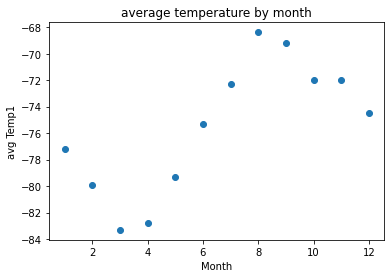

In [85]:
# Create a graph 
plt.scatter(avg_temp_df["month_data"],avg_temp_df["avg_temp"])
# set the labels and titlle
plt.xlabel("Month")
plt.ylabel("avg Temp")
plt.title("average temperature by month")
# Show the graph that we have created
plt.show()

In [308]:
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [86]:
# 4. Average pressure by Martian month
avg_press = mars_df.groupby(["month"]).mean()["pressure"]
avg_press

month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64

In [88]:
avg_press_df = pd.DataFrame({
    "month_data": avg_press.index,
    "avg_press" : avg_press})

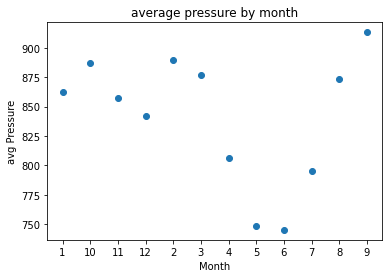

In [89]:
# Plot the average pressure by month
# Create a graph 
plt.scatter(avg_press_df["month_data"],avg_press_df["avg_press"])
# set the labels and titlle
plt.xlabel("Month")
plt.ylabel("avg Pressure")
plt.title("average pressure by month")
# Show the graph that we have created
plt.show()

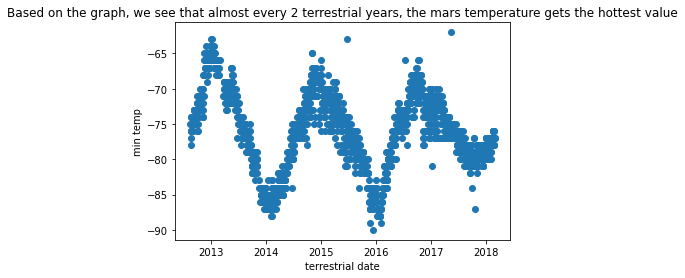

In [102]:
# 5. How many terrestrial (earth) days are there in a Martian year?

plt.scatter(mars_df["terrestrial_date"],mars_df["min_temp"])
# set the labels and titlle
plt.xlabel("terrestrial date")
plt.ylabel("min temp")
plt.title("Based on the graph, we see that almost every 2 terrestrial years, the mars temperature gets the hottest value")
# Show the graph that we have created
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [95]:
# Write the data to a CSV
# write down in a file the dictionary

import os
import csv

mars_df.to_csv('Resources\output_Mars.csv')
               

In [ ]:
browser.quit()